AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import pandas as pd
data_frame = pd.read_csv("titanic.csv")

print(data_frame.head(10))
print(data_frame.tail(20))
print(data_frame.info())
print(data_frame.describe())


   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0  

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0
1
0


/var/folders/dp/hl04jht92kb8s8m6w7873t580000gn/T/ipykernel_3570/2327823953.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_frame["New_Cabin"] = data_frame["Cabin"].fillna(method='ffill')
/var/folders/dp/hl04jht92kb8s8m6w7873t580000gn/T/ipykernel_3570/2327823953.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_frame["New_Survived"] = data_frame["Survived"].fillna(method='ffill')


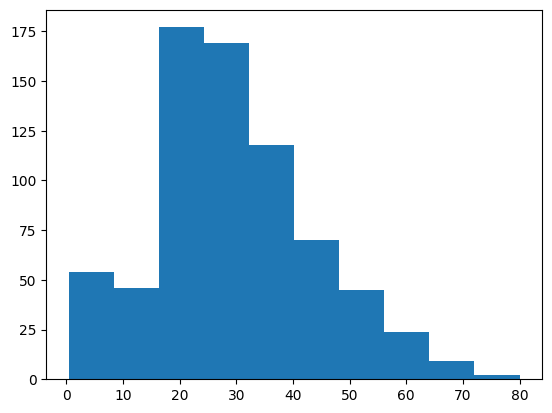

In [2]:
import matplotlib.pyplot as plt
print(data_frame.isna().sum())

plt.hist(data_frame["Age"])

age_mean = data_frame["Age"].mean() 
data_frame["New_Age"] = data_frame["Age"].fillna(age_mean)
print(data_frame["New_Age"].isna().sum())

data_frame["New_Cabin"] = data_frame["Cabin"].fillna(method='ffill')
print(data_frame["New_Cabin"].isna().sum())

embarked_mode= data_frame["Embarked"].mode()[0]
data_frame["New_Embarked"] = data_frame["Embarked"].fillna(embarked_mode)
print(data_frame["New_Embarked"].isna().sum())

data_frame["New_Survived"] = data_frame["Survived"].fillna(method='ffill')
data_frame["New_Survived"] = pd.to_numeric(data_frame["New_Survived"], errors = "coerce")

data_frame["New_Fare"] = data_frame["Fare"].str.replace('$', '').str.replace(',', '')
data_frame["New_Fare"] = pd.to_numeric(data_frame["New_Fare"], errors="coerce")



AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

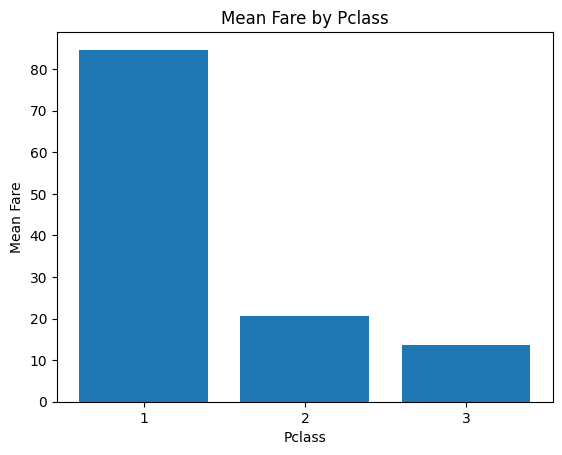

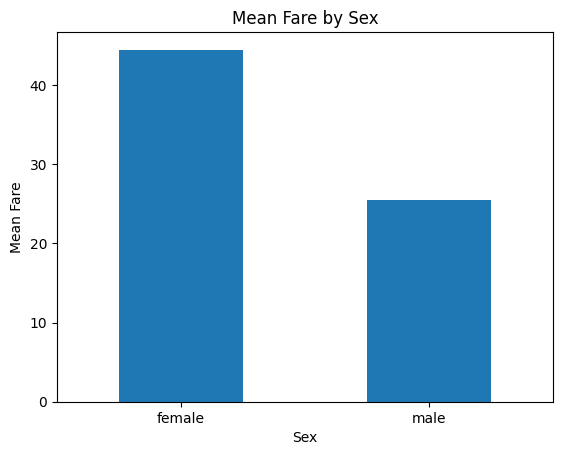

In [3]:
data_frame["Fare"] = pd.to_numeric(data_frame["Fare"], errors="coerce")
data_frame_fare_by_Pclass = data_frame.groupby("Pclass")["Fare"].mean().reset_index()

plt.bar(data_frame_fare_by_Pclass["Pclass"].astype(str), data_frame_fare_by_Pclass["Fare"])
plt.title("Mean Fare by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Mean Fare")
plt.show()

data_frame_fare_by_Sex = data_frame.groupby("Sex")["Fare"].mean()

data_frame_fare_by_Sex.plot.bar()
plt.title("Mean Fare by Sex")
plt.xlabel("Sex")
plt.ylabel("Mean Fare")
plt.xticks(rotation=0)
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

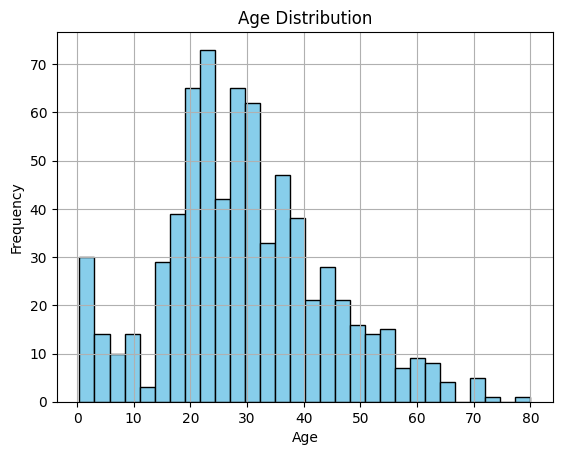

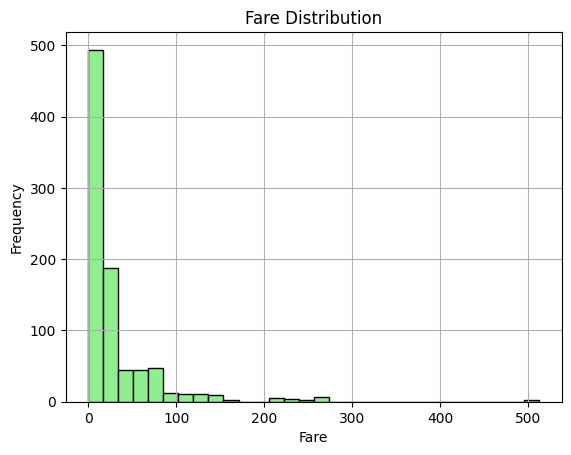

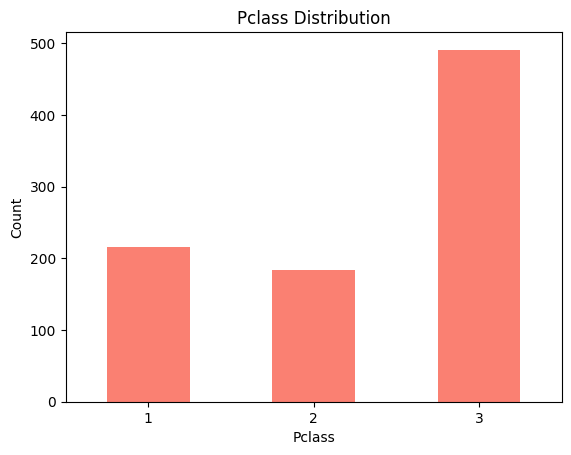

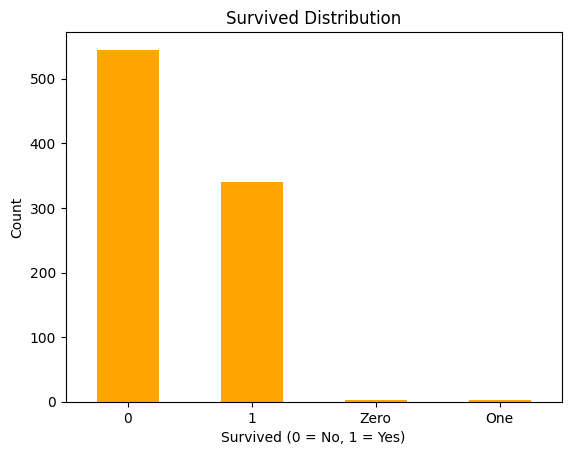

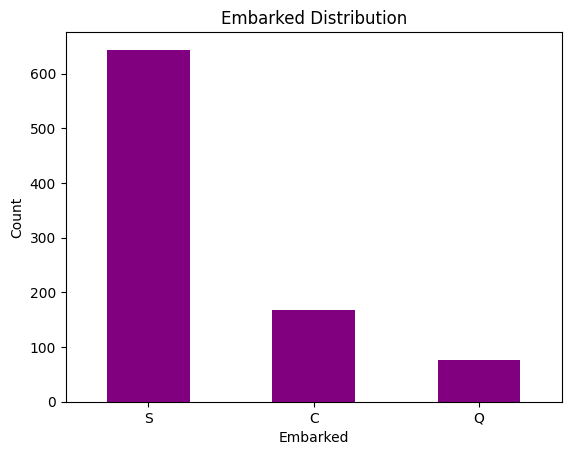

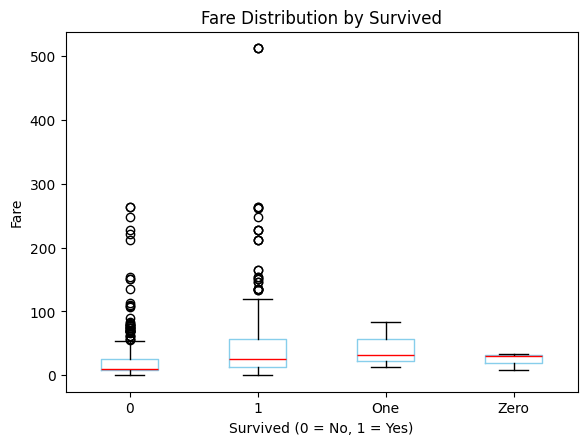

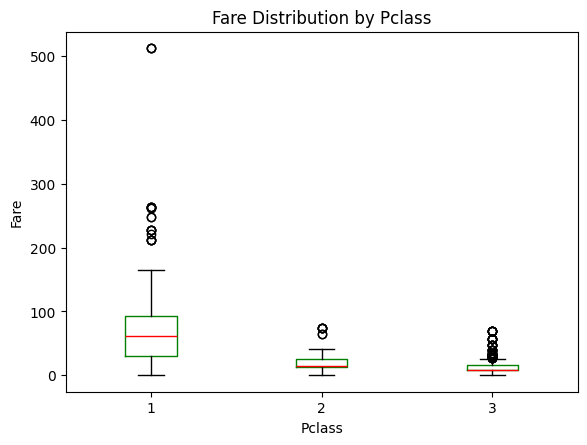

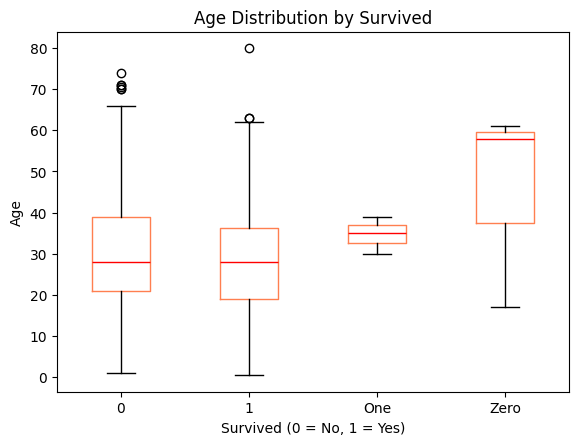

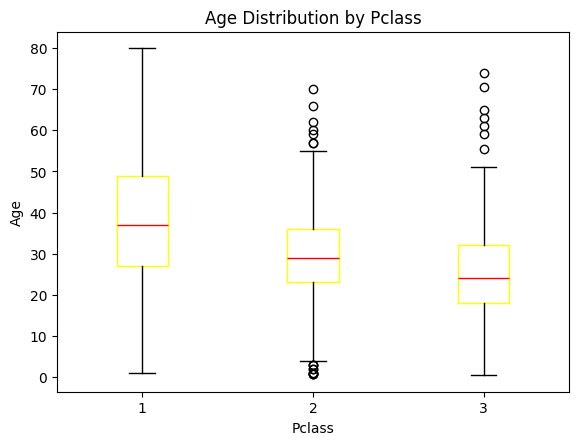

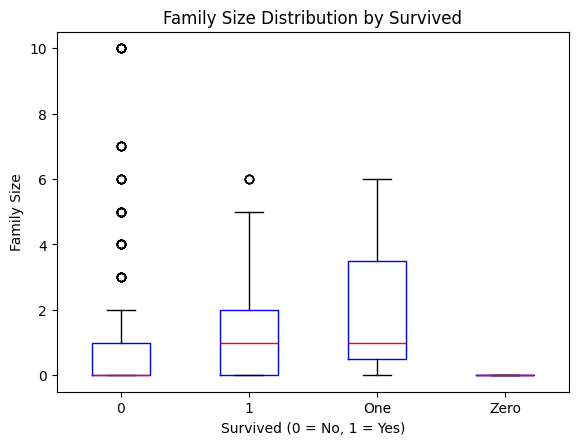

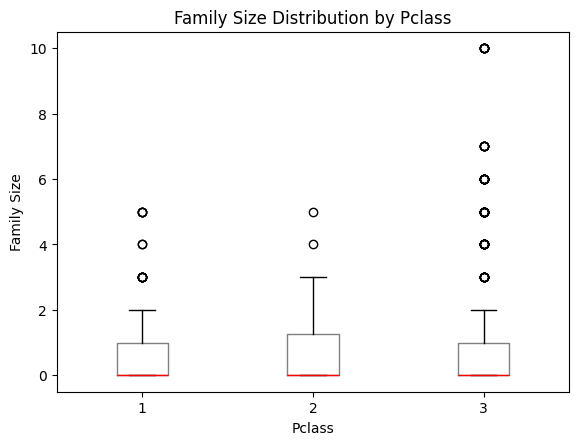

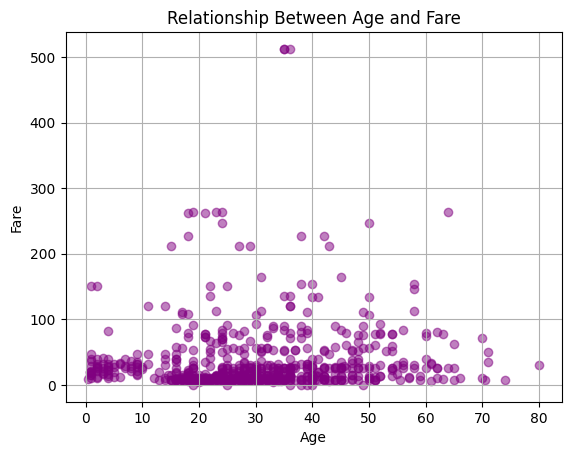

In [4]:
data_frame['Age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

data_frame['Fare'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

data_frame['Pclass'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

data_frame['Survived'].value_counts().plot(kind='bar', color='orange')
plt.title('Survived Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

data_frame['Embarked'].value_counts().plot(kind='bar', color='purple')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

data_frame.boxplot(column='Fare', by='Survived', grid=False, color={'boxes': 'skyblue', 'whiskers': 'black', 'medians': 'red'})
plt.title('Fare Distribution by Survived')
plt.suptitle('') 
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

data_frame.boxplot(column='Fare', by='Pclass', grid=False, color={'boxes': 'green', 'whiskers': 'black', 'medians': 'red'})
plt.title('Fare Distribution by Pclass')
plt.suptitle('')  
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

data_frame.boxplot(column='Age', by='Survived', grid=False, color={'boxes': 'coral', 'whiskers': 'black', 'medians': 'red'})
plt.title('Age Distribution by Survived')
plt.suptitle('')  
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

data_frame.boxplot(column='Age', by='Pclass', grid=False, color={'boxes': 'yellow', 'whiskers': 'black', 'medians': 'red'})
plt.title('Age Distribution by Pclass')
plt.suptitle('')  
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

data_frame['FamilySize'] = data_frame['SibSp'] + data_frame['Parch']

data_frame.boxplot(column='FamilySize', by='Survived', grid=False, color={'boxes': 'blue', 'whiskers': 'black', 'medians': 'red'})
plt.title('Family Size Distribution by Survived')
plt.suptitle('')  
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Family Size')
plt.show()

data_frame.boxplot(column='FamilySize', by='Pclass', grid=False, color={'boxes': 'grey', 'whiskers': 'black', 'medians': 'red'})
plt.title('Family Size Distribution by Pclass')
plt.suptitle('')  
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()

plt.scatter(data_frame['Age'], data_frame['Fare'], alpha=0.5, color='purple')
plt.title('Relationship Between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

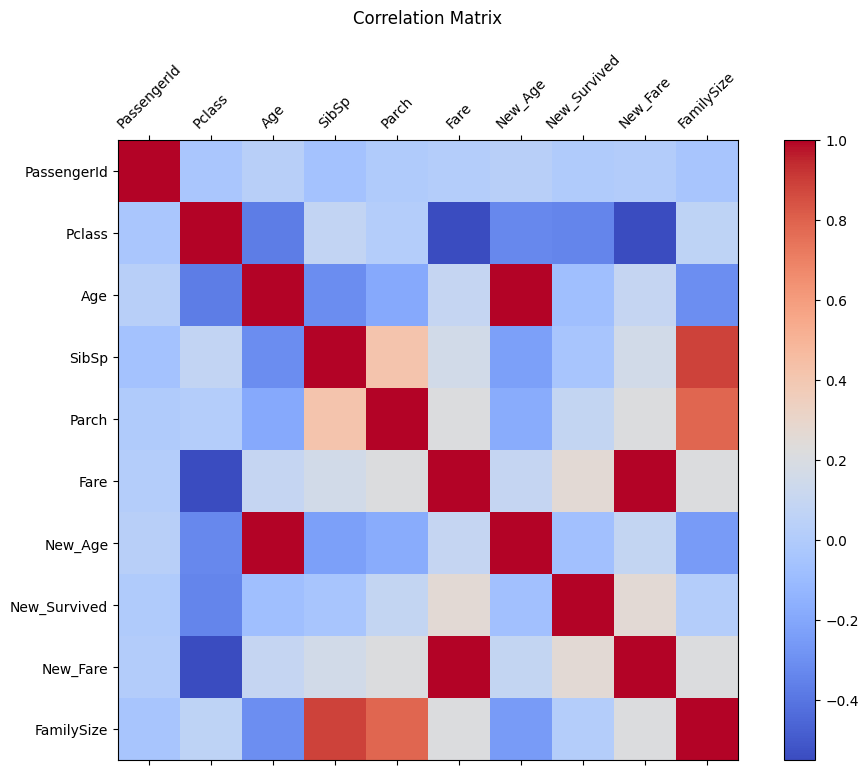

Correlation between Age and Fare: 0.10
The 'Survived' column is not present in the correlation matrix.


In [5]:
# Answer Based on ChatGPT cause we don't know how this working...
# 选择数值型列
numeric_data_frame = data_frame.select_dtypes(include=['number'])

# 生成相关性矩阵
correlation_matrix = numeric_data_frame.corr()

# 绘制相关性矩阵
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

# 计算 'Age' 和 'Fare' 的相关性
age_fare_correlation = data_frame['Age'].corr(data_frame['Fare'])
print(f"Correlation between Age and Fare: {age_fare_correlation:.2f}")

# 确保相关性矩阵中包含 'Survived'
if 'Survived' in correlation_matrix.columns:
    survived_correlations = correlation_matrix['Survived'].sort_values(ascending=False)
    print(survived_correlations)
else:
    print("The 'Survived' column is not present in the correlation matrix.")
